<a href="https://colab.research.google.com/github/zunayed-islam/Mysite/blob/main/zunayed_try06_Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library


In [265]:
# Importing necessary libraries
import numpy as np  # Numerical operations and array handling
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # Statistical data visualization

from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels
from sklearn.preprocessing import StandardScaler  # Standardizing features
from sklearn.model_selection import train_test_split  # Splitting datasets

from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron Classifier

from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier

#Import Dataset


In [266]:
# Reading a CSV file into a Pandas DataFrame
data = pd.read_csv("/content/Mushroom/agaricus-lepiota.data")


**visualize data set**


In [267]:
#Check the data
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [268]:
# Retrieving the column names of the DataFrame
data.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

#Preprocessing

In [269]:
# Check for null elements in the dataset
null_elements_before = data.isnull().sum().sum()
print("Number of null elements before:", null_elements_before)



Number of null elements before: 0


**Mapping of the dataset  [encoding data to numarical value using label encoder**


In [270]:
# Initializing an empty list to store mappings
mappings = list()

# Creating a LabelEncoder instance
encoder = LabelEncoder()

# Iterating over columns in the DataFrame
for column in range(len(data.columns)):
    # Encoding the categorical column and replacing it in the DataFrame
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])

    # Creating a dictionary to map encoded labels back to their original values
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}

    # Appending the mapping dictionary to the list
    mappings.append(mappings_dict)

In [271]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

#From the dataset i can see the first row is not the title column (name of each coluumn)  it represents. So I am using the frist row as title coloumn.

In [272]:
# Extracting the target variable 'p' (class labels) from the DataFrame
y = data['p']  # Target variable

# Extracting the features (independent variables) by removing the target variable from the DataFrame
X = data.drop('p', axis=1)  # Features (excluding the target variable 'p')

In [273]:
X

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8119,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8120,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8121,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [274]:
y

0       0
1       0
2       1
3       0
4       0
       ..
8118    0
8119    0
8120    0
8121    1
8122    0
Name: p, Length: 8123, dtype: int64

#converted the columns with categorical data into normalized numeric data

In [275]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Scaling the features in X using the StandardScaler
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [276]:
X

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1.029843,0.140137,1.765745,1.186092,-1.970181,0.162907,-0.438896,-0.668905,-0.229013,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.250545,-1.313112,-0.295537
1,-2.086928,0.140137,1.372944,1.186092,-0.544073,0.162907,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.250545,-1.313112,0.867566
2,1.029843,0.953230,1.372944,1.186092,0.882034,0.162907,-0.438896,1.494980,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.670255,-0.514429,2.030668
3,1.029843,0.140137,-0.591064,-0.843105,0.406665,0.162907,2.278445,-0.668905,-0.229013,0.873386,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,-1.272091,-0.250545,-2.910478,-0.295537
4,1.029843,0.953230,1.765745,1.186092,-1.970181,0.162907,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.670255,-1.313112,-0.295537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,-0.216866,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,1.748194,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-3.978797,-0.256149,0.948192,-1.509675,-2.111795,0.286015
8119,1.029843,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,1.748194,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-8.099640,-0.256149,0.948192,-1.509675,0.284254,0.286015
8120,-0.840220,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-3.978797,-0.256149,0.948192,-1.509675,-2.111795,0.286015
8121,-0.216866,0.953230,-0.198263,-0.843105,1.832772,0.162907,-0.438896,1.494980,-1.358845,0.873386,...,-0.892945,0.622495,0.632046,0.0,0.142046,-0.256149,-1.272091,1.428295,0.284254,0.286015


# Splitting the dataset into training and testing sets

In [277]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#Model Selection

In [278]:
# Creating instances of machine learning models
log_model = LogisticRegression(C=5)  # Logistic Regression model

# Support Vector Machine (SVM) model with a radial basis function (RBF) kernel
svm_model = SVC(C=1.0, kernel='rbf')

# Multi-layer Perceptron (MLP) Classifier with two hidden layers of 128 neurons each
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100))

# Random Forest Classifier model
rf_model = RandomForestClassifier()

**Training**


In [279]:
# Calculating the proportion of positive class labels in the target variable 'y'
positive_class_proportion = np.sum(y) / len(y)

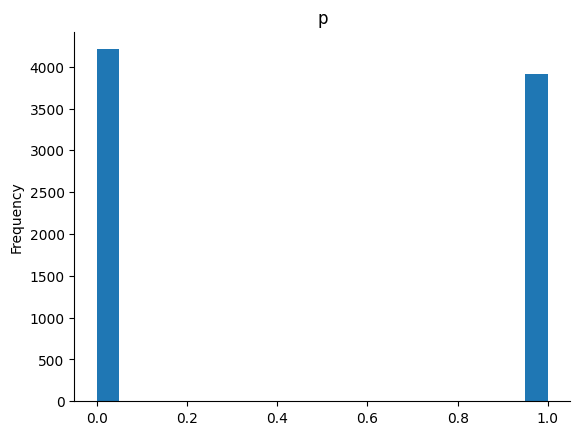

In [280]:
#visualize the target column of the dataset

data['p'].plot(kind='hist', bins=20, title='p')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [281]:
# Training the machine learning models on the training data
log_model.fit(X_train, y_train)  # Training the Logistic Regression model

svm_model.fit(X_train, y_train)  # Training the Support Vector Machine model

nn_model.fit(X_train, y_train)   # Training the Multi-layer Perceptron Classifier

rf_model.fit(X_train, y_train)   # Training the Random Forest Classifier

RandomForestClassifier()

# Printing the accuracy scores of each trained model on the test data

In [234]:
print(f"---Logistic Regression: {log_model.score(X_test, y_test)}")  # Accuracy of Logistic Regression model
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)}")   # Accuracy of Support Vector Machine model
print(f"--------Neural Network: {nn_model.score(X_test, y_test)}")     # Accuracy of Neural Network model
print(f"---------Random Forest: {rf_model.score(X_test, y_test)}")     # Accuracy of Random Forest model


---Logistic Regression: 0.9612307692307692
Support Vector Machine: 1.0
--------Neural Network: 1.0
---------Random Forest: 1.0


In [282]:
# Printing the shape of the test set features (X_test)
print(X_test.shape)  # Displaying the shape of the test set features

(1625, 22)


#Heat map generation to check which features are dominating the results

<Axes: >

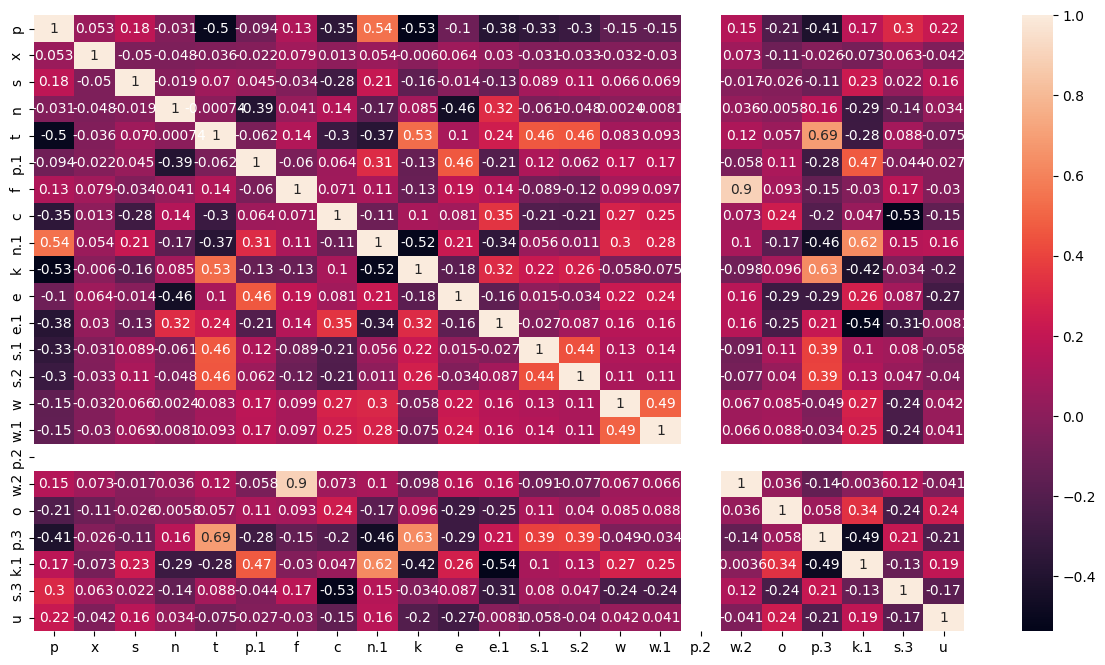

In [283]:
# Calculating the correlation matrix for the entire dataset
corr = data.corr()
plt.figure(figsize=(15,8))
# Creating a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=True)  # Using Seaborn to plot a heatmap of the correlation matrix


#Check if there are any high bias or variance

In [284]:
from sklearn.metrics import accuracy_score, log_loss

#Graph for logistic regression
# Make predictions on both train and test sets
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

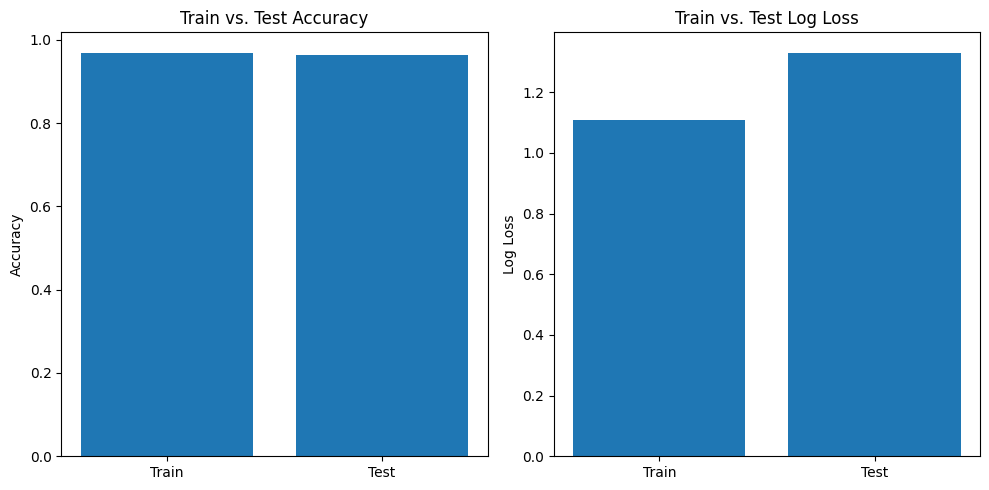

In [285]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

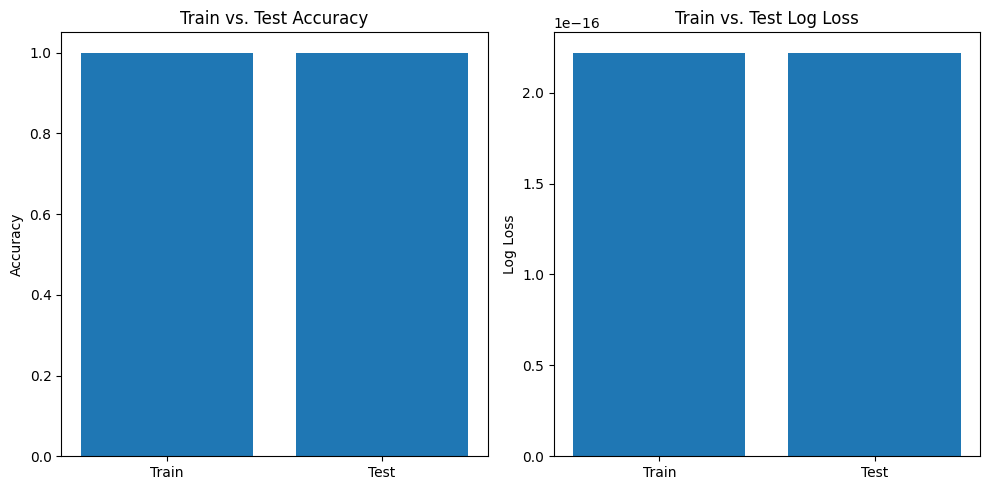

In [240]:
#Graph for SVM


# Make predictions on both train and test sets
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

#Doing every thing as same but splitting into train 60%, cross-validation 20% and test 20%

Number of null elements before: 0
---Logistic Regression: 0.9618461538461538 (Validation)
Support Vector Machine: 1.0 (Validation)
--------Neural Network: 1.0 (Validation)
---------Random Forest: 1.0 (Validation)
---Logistic Regression: 0.9747692307692307 (Test)
Support Vector Machine: 1.0 (Test)
--------Neural Network: 1.0 (Test)
---------Random Forest: 1.0 (Test)


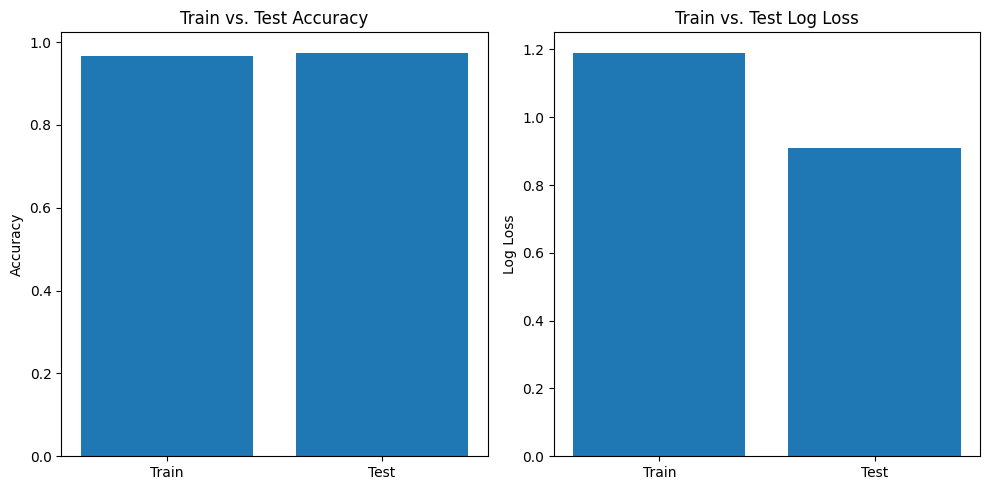

In [286]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Reading a CSV file into a Pandas DataFrame
data = pd.read_csv("/content/Mushroom/agaricus-lepiota.data")

# Check the data
data

# Retrieving the column names of the DataFrame
data.columns

# Check for null elements in the dataset
null_elements_before = data.isnull().sum().sum()
print("Number of null elements before:", null_elements_before)

# Initializing an empty list to store mappings
mappings = list()

# Creating a LabelEncoder instance
encoder = LabelEncoder()

# Iterating over columns in the DataFrame
for column in range(len(data.columns)):
    # Encoding the categorical column and replacing it in the DataFrame
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])

    # Creating a dictionary to map encoded labels back to their original values
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}

    # Appending the mapping dictionary to the list
    mappings.append(mappings_dict)

# Extracting the target variable 'p' (class labels) from the DataFrame
y = data['p']  # Target variable

# Extracting the features (independent variables) by removing the target variable from the DataFrame
X = data.drop('p', axis=1)  # Features (excluding the target variable 'p')

# Creating a StandardScaler instance
scaler = StandardScaler()

# Scaling the features in X using the StandardScaler
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Creating instances of machine learning models
log_model = LogisticRegression(C=5)  # Logistic Regression model
svm_model = SVC(C=1.0, kernel='rbf')  # Support Vector Machine model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100))  # Multi-layer Perceptron Classifier
rf_model = RandomForestClassifier()  # Random Forest Classifier

# Training the machine learning models on the training data
log_model.fit(X_train, y_train)  # Training the Logistic Regression model
svm_model.fit(X_train, y_train)  # Training the Support Vector Machine model
nn_model.fit(X_train, y_train)   # Training the Multi-layer Perceptron Classifier
rf_model.fit(X_train, y_train)   # Training the Random Forest Classifier

# Evaluating the models on the validation set
print(f"---Logistic Regression: {log_model.score(X_valid, y_valid)} (Validation)")
print(f"Support Vector Machine: {svm_model.score(X_valid, y_valid)} (Validation)")
print(f"--------Neural Network: {nn_model.score(X_valid, y_valid)} (Validation)")
print(f"---------Random Forest: {rf_model.score(X_valid, y_valid)} (Validation)")

# Evaluating the models on the test set
print(f"---Logistic Regression: {log_model.score(X_test, y_test)} (Test)")
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)} (Test)")
print(f"--------Neural Network: {nn_model.score(X_test, y_test)} (Test)")
print(f"---------Random Forest: {rf_model.score(X_test, y_test)} (Test)")

# Make predictions on both train and test sets
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

# Create subplots for accuracy and log loss
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()
